# Plasticity with isotropic hardening

In [1]:
%matplotlib inline

import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from simcoon import simmit as sim
from scipy.interpolate import griddata
import os
from IPython.display import HTML
dir = os.path.dirname(os.path.realpath('__file__'))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

The elastic-plastic (isotropic with kinematical hardening) constitutive law implemented in SMART+ is a rate independent, isotropic, von Mises type material with power-law isotropic hardening. 
Eight parameters are required for the thermomechanical version: 

1. The Young modulus $E$,
2. The Poisson ratio $\nu$,
3. The coefficient of thermal expansion $\alpha$,
4. The von Mises equivalent yield stress limit $R_e$,
5. The hardening parameter $k$,
6. The hardening exponent $m$.
7. The kinematic hardening parameter $k_X$

In [15]:
umat_name = 'EPKCP' #This is the 5 character code for the elastic-plastic subroutine
nstatev = 14 #The number of scalar variables required, only the initial temperature is stored here

E = 200000
nu = 0.342
alpha = 0.86E-5
Re = 400
H = 3000
beta = 1
kX = 0

##local orientation
psi_rve = 0.
theta_rve = 0.
phi_rve = 0.

#Define the properties
props = np.array([E, nu, alpha, Re, H, beta, kX])
path_data = 'data'
path_results = 'results'

#Run the simulation
pathfile = 'path.txt'
outputfile = 'results_EPICP.txt'
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, 0, 2, path_data, path_results, pathfile, outputfile)

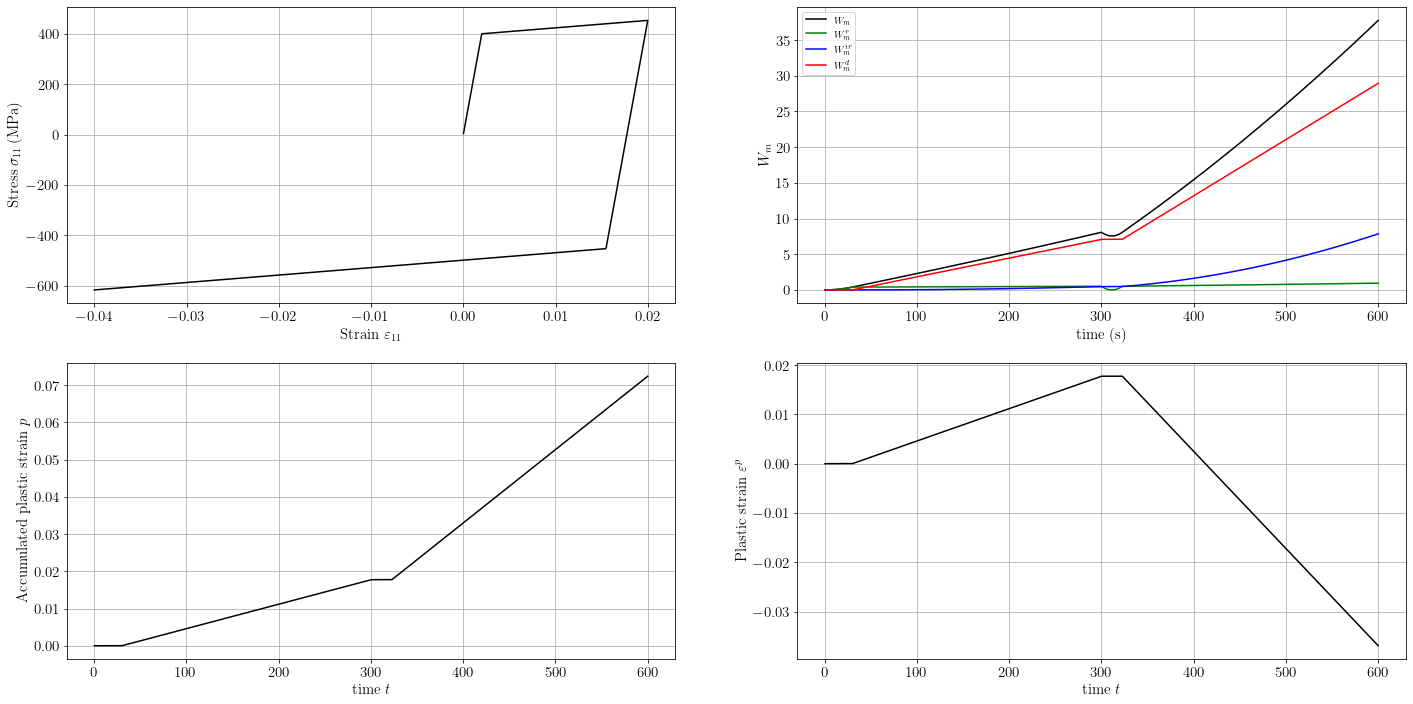

In [16]:
#prepare the load
fig = plt.figure()
outputfile_global = 'results_EPICP_global-0.txt'
pylab.rcParams['figure.figsize'] = (24.0, 12.0) #configure the figure output size
path = dir + '/results/'
P_global = path + outputfile_global

#Get the data
e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(P_global, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
time, T, Q, r = np.loadtxt(P_global, usecols=(4,5,6,7), unpack=True)
Wm, Wm_r, Wm_ir, Wm_d = np.loadtxt(P_global, usecols=(20,21,22,23), unpack=True)
p, Ep = np.loadtxt(P_global, usecols=(24,25), unpack=True)

#Plot the results
ax = fig.add_subplot(2, 2, 1)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'Strain $\varepsilon_{11}$', size = 15)
plt.ylabel(r'Stress $\sigma_{11}$\,(MPa)', size = 15)
plt.plot(e11,s11, c='black', label='direction 1')
#plt.legend(loc=2)

ax = fig.add_subplot(2, 2, 2)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('time (s)', size = 15)
plt.ylabel(r'$W_m$',size = 15)
plt.plot(time,Wm, c='black', label=r'$W_m$')
plt.plot(time,Wm_r, c='green', label=r'$W_m^r$')
plt.plot(time,Wm_ir, c='blue', label=r'$W_m^{ir}$')
plt.plot(time,Wm_d, c='red', label=r'$W_m^d$')
plt.legend(loc=2)

ax = fig.add_subplot(2, 2, 3)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'time $t$', size = 15)
plt.ylabel(r'Accumulated plastic strain $p$', size = 15)
plt.plot(time,p, c='black', label='direction 1')
#plt.legend(loc=2)
           
ax = fig.add_subplot(2, 2, 4)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel(r'time $t$', size = 15)
plt.ylabel(r'Plastic strain $\varepsilon^p$', size = 15)
plt.plot(time,Ep, c='black', label='direction 1')
#plt.legend(loc=2)           


plt.show()

## Test now the increments 